# Feature Selection : Wrapper Methods

El proceso de selección de características se basa en un algoritmo de aprendizaje automático específico que intentamos encajar en un conjunto de datos determinado.

Sigue un enfoque de búsqueda codiciosa al evaluar todas las posibles combinaciones de características contra el criterio de evaluación. El criterio de evaluación es simplemente la medida del desempeño que depende del tipo de problema, por ejemplo, para el criterio de evaluación de regresión puede ser p-valores, R-cuadrado, R-cuadrado ajustado, de manera similar para la clasificación el criterio de evaluación puede ser accuracy, precision, recall, puntaje f1, etc. Finalmente, selecciona la combinación de características que da el resultados óptimos para el algoritmo de aprendizaje automático especificado.

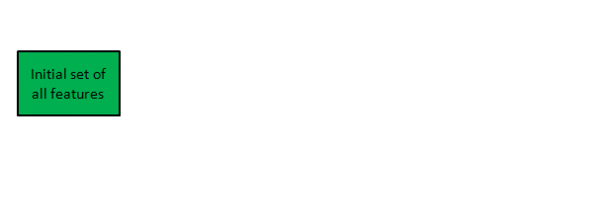

Los metodos mas comunes son:
1. Forward Selection
2. Backward elimination
3. Bi-directional elimination (stepwise)

Ahora analicemos los métodos con un ejemplo del conjunto de datos de precios de la vivienda de Boston disponible en sklearn. El conjunto de datos contiene 506 observaciones de 14 características diferentes. El conjunto de datos se puede importar utilizando la función load_boston() disponible en el módulo sklearn.datasets.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # dataset dimension
print(boston.feature_names)      # nombre feature 
print(boston.target)             # target variable
print(boston.DESCR)              # data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Convirtamos estos datos sin procesar en un marco de datos que incluya la variable de destino y los datos reales junto con los nombres de las funciones.

In [2]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [3]:
X

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]

In [4]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Forward selection

En la selección hacia adelante, comenzamos con un modelo nulo y luego comenzamos a ajustar el modelo con cada característica individual una a la vez y seleccionamos la característica con el valor p mínimo. Ahora ajuste un modelo con dos características probando combinaciones de la característica seleccionada anteriormente con todas las demás características restantes. Vuelva a seleccionar la función con el valor p mínimo. Ahora ajuste un modelo con tres características probando combinaciones de dos características previamente seleccionadas con otras características restantes. Repita este proceso hasta que tengamos un conjunto de características seleccionadas con un valor p de características individuales menor que el nivel de significancia.

En resumen, los pasos para la técnica de selección hacia adelante son los siguientes:

1. Elija un nivel de significancia (por ejemplo, SL = 0.05 con un 95% de confianza).

2. Ajuste todos los modelos de regresión simple posibles considerando una característica a la vez. Los modelos totales 'n' son posibles. Seleccione la característica con el valor p más bajo.

3. Ajuste todos los modelos posibles con una característica adicional agregada a las características seleccionadas anteriormente.

4. Nuevamente, seleccione la función con un valor p mínimo. si $p_v <alpha$, vaya al Paso 3; de lo contrario, finalice el proceso.

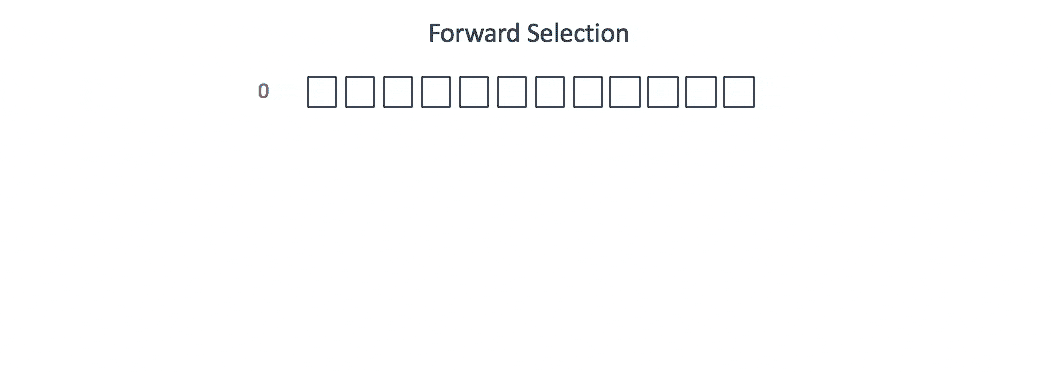

In [5]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Esta función anterior acepta datos, variable objetivo y nivel de significancia como argumentos y devuelve la lista final de características significativas basadas en valores p a través de la selección hacia adelante.

In [6]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']

# Implementacion usando funciones de Python


In [7]:
!pip install mlxtend 

In [8]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [9]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

La función SequentialFeatureSelector() acepta los siguientes argumentos principales:

* LinearRegression() es un estimador de todo el proceso. Del mismo modo, puede ser cualquier algoritmo basado en clasificación.

* k_features indica el número de características que se seleccionarán. Puede ser cualquier valor aleatorio, pero el valor óptimo se puede encontrar analizando y visualizando las puntuaciones para diferentes números de características.

* argumentos hacia adelante y flotantes forward = Verdadero y floating = Falso son para la técnica de selección hacia adelante.

* El argumento de puntuación especifica el criterio de evaluación que se utilizará. Para problemas de regresión, solo hay una puntuación $r^2$ en la implementación predeterminada. De manera similar, para la clasificación, puede ser exactitud, precisión, recuperación, puntaje f1, etc.

* El argumento cv es para la validación cruzada usando k-fold.

In [10]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

# Backward selection

En la eliminación hacia atrás, comenzamos con el modelo completo (incluidas todas las variables independientes) y luego eliminamos la característica insignificante con el valor p más alto (> nivel de significancia). Este proceso se repite una y otra vez hasta que tenemos el conjunto final de características importantes.

En resumen, los pasos involucrados en la eliminación hacia atrás son los siguientes:

1. Elija un nivel de significancia (por ejemplo, SL = 0.05 con un 95% de confianza).

2. Se ajusta a un modelo completo que incluye todas las características.

3. Considere la característica con el valor p más alto. Si el valor p> nivel de significancia, vaya al Paso 4; de lo contrario, finalice el proceso.

5. Elimine el feature que se está considerando.

6. Ajustar un modelo sin esta función. Repita todo el proceso desde el paso 3.

Ahora hagamos lo mismo con los datos de precios de la vivienda en Boston.

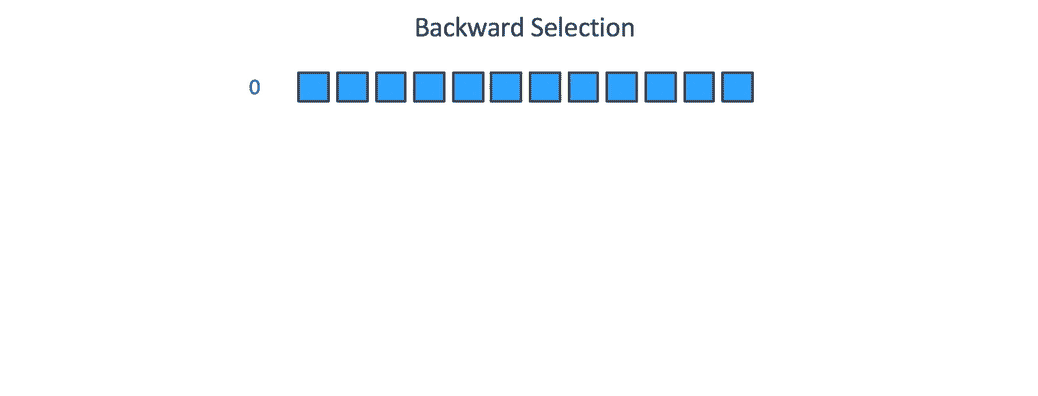

In [11]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [12]:
backward_elimination(X,y)

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

# Eliminación bidireccional (stepwise) 
Es similar a la selección hacia adelante, pero la diferencia es que al agregar una nueva característica, también verifica la importancia de las características ya agregadas y si encuentra que alguna de las características ya seleccionadas es insignificante, simplemente elimina esa característica en particular mediante la eliminación hacia atrás.

Por lo tanto, es una combinación de selección hacia adelante y eliminación hacia atrás.

En resumen, los pasos involucrados en la eliminación bidireccional son los siguientes:

1. Elija un nivel de significancia para ingresar y salir del modelo (por ejemplo, $SL_{in}$ = 0.05 y $SL_{out} = 0.05$ con un 95% de confianza).

2. Realice el siguiente paso de la selección hacia adelante (la función recién agregada debe tener un valor $p <SL_{in}$ para ingresar).

3. Realice todos los pasos de la eliminacion hacia atras (cualquier caracteristica agregada previamente con valor $p> SL_{out}$ está lista para salir del modelo).

4. Repita los pasos 2 y 3 hasta que obtengamos un conjunto óptimo final de características.

Hagamos lo mismo con los datos de precios de la vivienda en Boston.

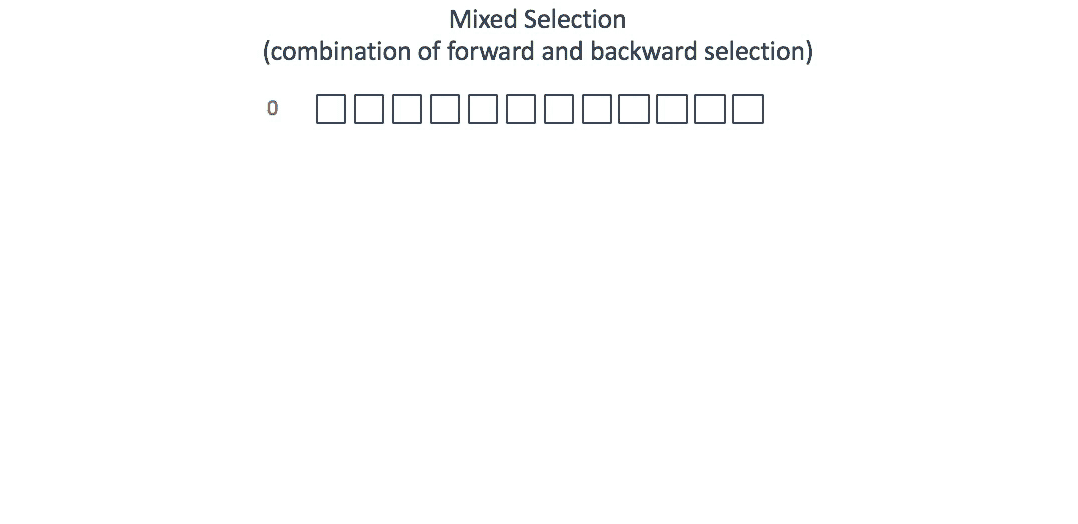

In [16]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [17]:
stepwise_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

# Metricas algoritmos de clasificacion

In [19]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [21]:
# Cargamos dataset de cancer de mama
data = load_breast_cancer()
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

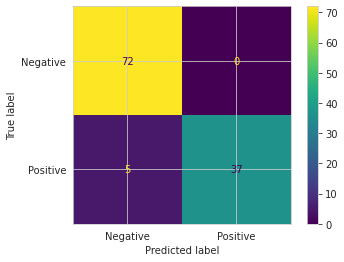

In [24]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [25]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([72,  0,  5, 37])

In [26]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.956140350877193

In [27]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(1.0, 0.935064935064935)

In [28]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.8809523809523809, 1.0)

In [29]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo 

(0.9367088607594937, 0.9664429530201343)

In [30]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



# Metrica algoritmos de regresion

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Carguemos un dataset de ejemplo
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [34]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(diabetes_X,diabetes_y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 45.21292481299676


Ventajas de MAE

- El MAE que obtiene está en la misma unidad que la variable de salida.
- Es más robusto a los valores atípicos.

Desventajas de MAE

- El gráfico de MAE no es diferenciable, por lo que debemos aplicar varios optimizadores, como el descenso de gradiente, que puede ser diferenciable.

In [38]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 3094.4295991207027


Ventajas de MSE

- La gráfica de MSE es diferenciable, por lo que puede usarla fácilmente como una función de pérdida.

Desventajas de MSE

- El valor que obtiene después de calcular MSE es una unidad de salida al cuadrado. por ejemplo, la variable de salida está en metros (m), luego de calcular el MSE, la salida que obtenemos está en metros cuadrados.
- Si tiene valores atípicos en el conjunto de datos, los penaliza más y el MSE calculado es mayor. Entonces, en resumen, no es robusto a los valores atípicos que fueron una ventaja en MAE.

In [39]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 55.62759745954073


Ventajas de RMSE

- El valor de salida que obtiene está en la misma unidad que la variable de salida requerida, lo que facilita la interpretación de la pérdida.

Desventajas de RMSE

- No es tan resistente a los valores atípicos en comparación con MAE para realizar RMSE tenemos que NumPy función de raíz cuadrada sobre MSE.

In [40]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 4.018679435298041


Esta métrica es muy útil cuando está desarrollando un modelo sin llamar a las entradas. En ese caso, la salida variará en gran escala.

Para controlar esta situación de RMSE, tomamos el registro del error de RMSE calculado y obtenemos como resultado RMSLE

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.4399387660024644


R2 es una métrica que indica el rendimiento de su modelo, no la pérdida en un sentido absoluto.

Por el contrario, MAE y MSE dependen del contexto como hemos visto, mientras que la puntuación R2 es independiente del contexto.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>